In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub      # To import the csv file directly from kagglehub without downloading
# Download latest version
path = kagglehub.dataset_download("abrambeyer/openintro-possum")
print("Path to dataset files:", path)

c:\Users\Perpetual's World\Desktop\Work\ai_engineering\module_two\my-venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 2.15k/2.15k [00:00<00:00, 2.03MB/s]

Extracting files...
Path to dataset files: C:\Users\Perpetual's World\.cache\kagglehub\datasets\abrambeyer\openintro-possum\versions\1


## Data Ingestion

In [7]:
# Adjust the display
pd.set_option("display.max_column", 50)
pd.set_option("display.max_row", 100)

# Load the data
possum_data = pd.read_csv(r"C:\Users\Perpetual's World\.cache\kagglehub\datasets\abrambeyer\openintro-possum\versions\1\possum.csv")

# Create a copy not to accidentally delete the original
possum = possum_data.copy()

possum.head(20)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
5,6,1,Vic,f,1.0,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0
6,7,1,Vic,m,2.0,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
7,8,1,Vic,f,6.0,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
8,9,1,Vic,f,9.0,93.4,56.3,91.5,37.0,72.4,52.9,15.5,28.0,33.0
9,10,1,Vic,f,6.0,91.8,58.0,89.5,37.5,70.9,53.4,14.4,27.5,32.0


## Preliminary Data Analysis (PDA)

In [ ]:
# Get the basic info on the data
possum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [ ]:
# Loading the last 5 
possum.tail()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0
103,104,7,other,f,3.0,93.6,59.9,89.0,40.0,67.6,46.0,14.8,28.5,33.5


In [ ]:
# Get the number of rows and columns
possum.shape            # (104, 14)

(104, 14)

In [ ]:
# Get the statistical summary
possum.describe(include="all")

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,104,104,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,other,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,58,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52.500000,3.625000,NaN,NaN,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,NaN,NaN,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,NaN,NaN,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,NaN,NaN,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,NaN,NaN,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,NaN,NaN,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000


## Data Cleaning

In [ ]:
# Checking for missing values
possum.isna().sum()

# We have two missing values in age and 1 missing value in footlgth

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [ ]:
# Drop missing values
possum.dropna()

possum.head(50)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
5,6,1,Vic,f,1.0,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0
6,7,1,Vic,m,2.0,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
7,8,1,Vic,f,6.0,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
8,9,1,Vic,f,9.0,93.4,56.3,91.5,37.0,72.4,52.9,15.5,28.0,33.0
9,10,1,Vic,f,6.0,91.8,58.0,89.5,37.5,70.9,53.4,14.4,27.5,32.0


In [ ]:
# Check for duplicate values
possum.duplicated().sum()

# Results show no duplicates

np.int64(0)

In [ ]:
# Check for data types
possum.dtypes

case          int64
site          int64
Pop          object
sex          object
age         float64
hdlngth     float64
skullw      float64
totlngth    float64
taill       float64
footlgth    float64
earconch    float64
eye         float64
chest       float64
belly       float64
dtype: object

## Visualizing the Data

In [ ]:
# Get the number of male and female possums
possum["sex"].value_counts()


sex
m    61
f    43
Name: count, dtype: int64

<Axes: ylabel='count'>

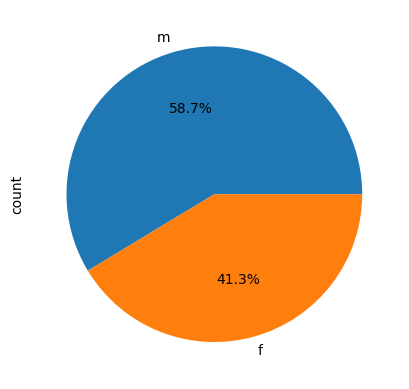

In [ ]:
# Representing the data using a pie chart
possum["sex"].value_counts().plot(kind="pie", autopct='%1.1f%%')
# plt.pie()

**From the pie chart, we can see that the male possums are 17.4% more than the female possums**

## Descriptive Data Analysis

In [ ]:
# Getting the mean for each feature of male and female
possum.groupby("sex").agg({"site": "mean", "age": "mean", "hdlngth": "mean", "skullw": "mean", "totlngth": "mean", "taill": "mean", "footlgth": "mean", "eye": "mean", "chest": "mean", "belly": "mean"})

,site,age,hdlngth,skullw,totlngth,taill,footlgth,eye,chest,belly
sex,,,,,,,,,,
f,2.976744,3.976744,92.148837,56.588372,87.906977,37.104651,69.111905,14.811628,27.337209,32.883721
m,4.081967,3.728814,92.922951,57.091803,86.511475,36.942623,68.009836,15.211475,26.762295,32.377049


In [ ]:
# The number of male and female grouped by site
site = possum.groupby("sex")["site"].sum()
site

sex
f    128
m    249
Name: site, dtype: int64

<Axes: ylabel='site'>

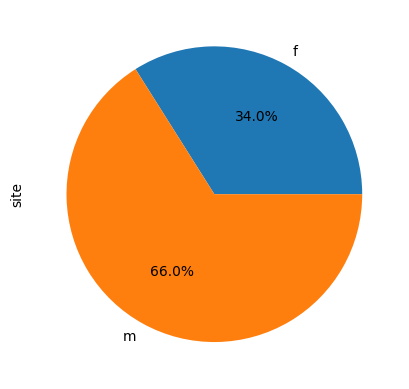

In [ ]:
site.plot(kind="bar", autopct='%1.1f%%')

In [ ]:
# Get statistical summary for all the features at once

stats = possum.groupby('sex')[['site', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']].describe().round(2)

site                                        age                        \
    count  mean   std  min  25%  50%  75%  max count  mean   std  min  25%   
sex                                                                          
f    43.0  2.98  2.22  1.0  1.0  2.0  5.0  7.0  43.0  3.98  1.95  1.0  3.0   
m    61.0  4.08  2.35  1.0  2.0  4.0  6.0  7.0  59.0  3.73  1.89  1.0  2.0   

                   hdlngth                                               \
     50%  75%  max   count   mean   std   min    25%   50%   75%    max   
sex                                                                       
f    4.0  5.0  9.0    43.0  92.15  2.57  84.7  90.75  92.5  93.8   96.9   
m    3.0  5.0  8.0    61.0  92.92  4.13  82.5  90.70  93.2  95.4  103.1   

    skullw  ... earconch   eye                                              \
     count  ...      max count   mean   std   min   25%   50%    75%   max   
sex         ...                                                              
f     43.0  ...     53.9  43.0  14.81  1.03  13.0  14.1  14.8  15.45  17.4   
m     61.0  ...     56.2  61.0  15.21  1.04  12.8  14.5  15.0  15.90  17.8   

    chest                                            belly                     \
    count   mean   std   min   25%   50%   75%   max count   mean   std   min   
sex                                                                             
f    43.0  27.34  1.84  23.0  26.0  28.0  28.5  31.0  43.0  32.88  2.93  25.0   
m    61.0  26.76  2.16  22.0  25.0  27.0  28.0  32.0  61.0  32.38  2.64  27.0   

                              
       25%   50%   75%   max  
sex                           
f    31.25  33.0  34.0  40.0  
m    30.50  32.0  35.0  38.0  

[2 rows x 88 columns]

In [ ]:
# Analyze the features of each sex
print("\n=== VISUAL REPRESENTATION FOR MEASURE OF CENTER ===")
for sex in ['m', 'f']:
    sex_data = possum[possum['sex'] == sex]
    
    print(f"\n{sex.upper()}ale Possum Sex (n={len(sex_data)} possums):")

    print("  hdlngth:")
    print(f"    Mean: {sex_data['hdlngth'].mean():.2f}")
    print(f"    Median: {sex_data['hdlngth'].median():.2f}")
    
    print("  skullw:")
    print(f"    Mean: {sex_data['skullw'].mean():.2f}")
    print(f"    Median: {sex_data['skullw'].median():.2f}")
    
    print("  totlngth:")
    print(f"    Mean: {sex_data['totlngth'].mean():.2f}")
    print(f"    Median: {sex_data['totlngth'].median():.2f}")
    
    print("  taill:")
    print(f"    Mean: {sex_data['taill'].mean():.2f}")
    print(f"    Median: {sex_data['taill'].median():.2f}")
    
    print("  footlgth:")
    print(f"    Mean: {sex_data['footlgth'].mean():.2f}")
    print(f"    Median: {sex_data['footlgth'].median():.2f}")
    
    print("  earconch:")
    print(f"    Mean: {sex_data['earconch'].mean():.2f}")
    print(f"    Median: {sex_data['earconch'].median():.2f}")
    
    print("  eye:")
    print(f"    Mean: {sex_data['eye'].mean():.2f}")
    print(f"    Median: {sex_data['eye'].median():.2f}")
    
    print("  chest:")
    print(f"    Mean: {sex_data['chest'].mean():.2f}")
    print(f"    Median: {sex_data['chest'].median():.2f}")
    
    print("  belly:")
    print(f"    Mean: {sex_data['belly'].mean():.2f}")
    print(f"    Median: {sex_data['belly'].median():.2f}")



=== VISUAL REPRESENTATION FOR MEASURE OF CENTER ===

Male Possum Sex (n=61 possums):
  hdlngth:
    Mean: 92.92
    Median: 93.20
  skullw:
    Mean: 57.09
    Median: 56.30
  totlngth:
    Mean: 86.51
    Median: 86.00
  taill:
    Mean: 36.94
    Median: 36.50
  footlgth:
    Mean: 68.01
    Median: 66.90
  earconch:
    Mean: 47.82
    Median: 46.40
  eye:
    Mean: 15.21
    Median: 15.00
  chest:
    Mean: 26.76
    Median: 27.00
  belly:
    Mean: 32.38
    Median: 32.00

Fale Possum Sex (n=43 possums):
  hdlngth:
    Mean: 92.15
    Median: 92.50
  skullw:
    Mean: 56.59
    Median: 56.40
  totlngth:
    Mean: 87.91
    Median: 88.50
  taill:
    Mean: 37.10
    Median: 37.50
  footlgth:
    Mean: 69.11
    Median: 70.45
  earconch:
    Mean: 48.58
    Median: 50.80
  eye:
    Mean: 14.81
    Median: 14.80
  chest:
    Mean: 27.34
    Median: 28.00
  belly:
    Mean: 32.88
    Median: 33.00


In [ ]:
print("\n=== VISUAL REPRESENTATION FOR MEASURE OF CENTER (MODE) ===")
for sex in ['m', 'f']:
    sex_data = possum[possum['sex'] == sex]

    print(f"\n{sex.upper()}ale Possum Sex (n={len(sex_data)} possums):")
    
    print("  site:")
    print(f"    Mode: {sex_data['site'].mode()}")

    print("  age:")
    print(f"    Mode: {sex_data['age'].mode()}")

    print("  hdlngth:")
    print(f"    Mode: {sex_data['hdlngth'].mode()}")
    
    print("  skullw:")
    print(f"    Mode: {sex_data['skullw'].mode()}")
    
    print("  totlngth:")
    print(f"    Mode: {sex_data['totlngth'].mode()}")
    
    print("  taill:")
    print(f"    Mode: {sex_data['taill'].mode()}")
    
    print("  footlgth:")
    print(f"    Mode: {sex_data['footlgth'].mode()}")
    
    print("  earconch:")
    print(f"    Mode: {sex_data['earconch'].mode()}")
    
    print("  eye:")
    print(f"    Mode: {sex_data['eye'].mode()}")
    
    print("  chest:")
    print(f"    Mode: {sex_data['chest'].mode()}")
    
    print("  belly:")
    print(f"    Mode: {sex_data['belly'].mode()}")


=== VISUAL REPRESENTATION FOR MEASURE OF CENTER (MODE) ===

Male Possum Sex (n=61 possums):
  site:
    Mode: 0    1
1    7
Name: site, dtype: int64
  age:
    Mode: 0    3.0
Name: age, dtype: float64
  hdlngth:
    Mode: 0     89.5
1     90.6
2     90.7
3     91.4
4     91.6
5     92.4
6     92.8
7     93.3
8     93.8
9     94.1
10    94.4
11    95.4
Name: hdlngth, dtype: float64
  skullw:
    Mode: 0    56.0
1    57.6
Name: skullw, dtype: float64
  totlngth:
    Mode: 0    84.0
1    85.0
2    89.0
Name: totlngth, dtype: float64
  taill:
    Mode: 0    38.0
Name: taill, dtype: float64
  footlgth:
    Mode: 0    65.6
Name: footlgth, dtype: float64
  earconch:
    Mode: 0    44.9
1    46.8
Name: earconch, dtype: float64
  eye:
    Mode: 0    15.0
Name: eye, dtype: float64
  chest:
    Mode: 0    27.0
Name: chest, dtype: float64
  belly:
    Mode: 0    35.0
Name: belly, dtype: float64

Fale Possum Sex (n=43 possums):
  site:
    Mode: 0    1
Name: site, dtype: int64
  age:
    Mode: 0  

## Observation from Measure of Center

_________________________________________________________
**Interpreting The Results Above - Possum Analysis**
_________________________________________________________